# Multivarient Analysis

### Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DataFrame

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S


### Dataframe Coln info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Scatter Plot : Numerical-Numerical Relationship

A **scatter plot** is a graph that shows the relationship between two numerical variables. Each point represents a data pair, with one variable on the x-axis and the other on the y-axis. It helps identify patterns, trends, or correlations — for example, whether the variables increase together (positive correlation), decrease together (negative correlation), or show no clear relationship. Scatter plots are widely used in data analysis to spot trends and outliers.


<Axes: xlabel='Parch', ylabel='Fare'>

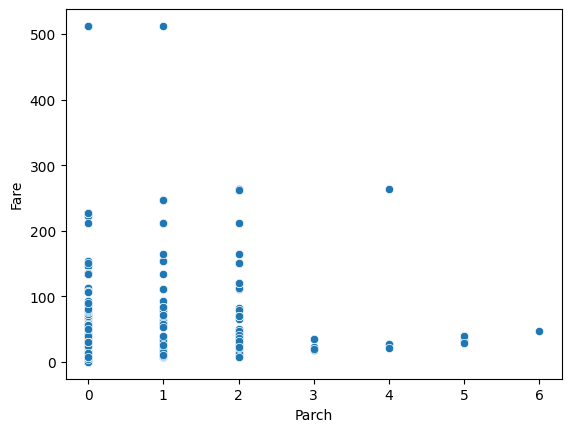

In [5]:
sns.scatterplot(x='Parch', y='Fare', data=df)

<Axes: xlabel='SibSp', ylabel='Fare'>

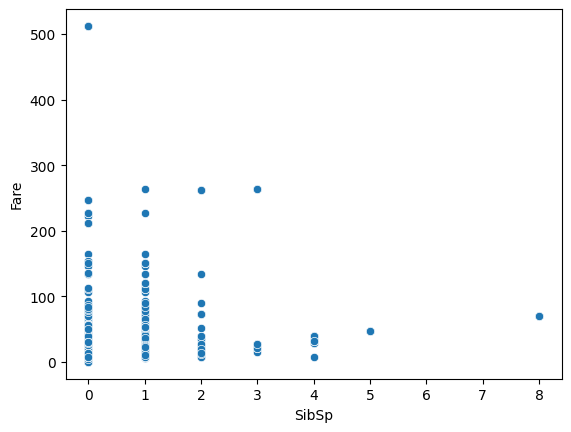

In [6]:
sns.scatterplot(x='SibSp', y='Fare', data=df)

# Lineplot : Numerical Numerical

A **pairplot** is a grid of scatter plots that shows the relationships between **all pairs of variables** in a dataset. Along the diagonal, it often displays the distribution of each individual variable (like a histogram or KDE). Pairplots help visualize correlations, patterns, and potential outliers across multiple variables at once, making them a great tool for exploratory data analysis. They’re commonly used with small to medium-sized datasets to get a quick overview of how variables interact.


<Axes: xlabel='Pclass', ylabel='Fare'>

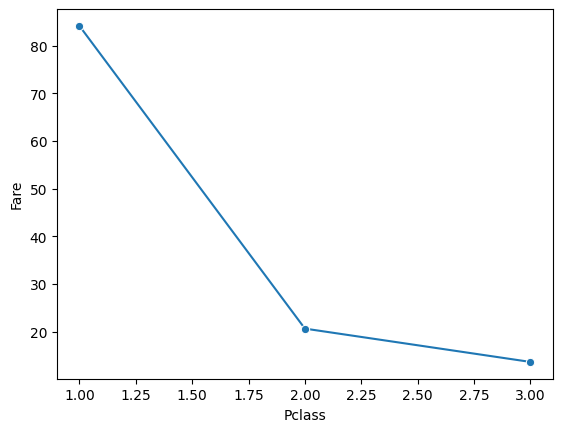

In [60]:
avg_fare_by_class = df.groupby('Pclass')['Fare'].mean().reset_index()
sns.lineplot(data=avg_fare_by_class, x='Pclass', y='Fare', marker='o')

# Barplot : Numerical - Catagorical

A **bar plot** (or bar chart) is a graph used to compare **categorical data** using rectangular bars. Each bar represents a category, and its height (or length) shows the value or frequency of that category. Bar plots make it easy to compare different groups or track changes over time when categories are discrete. They can be displayed vertically or horizontally and are commonly used to visualize survey results, counts, or averages across categories.


<Axes: xlabel='Survived', ylabel='Sex'>

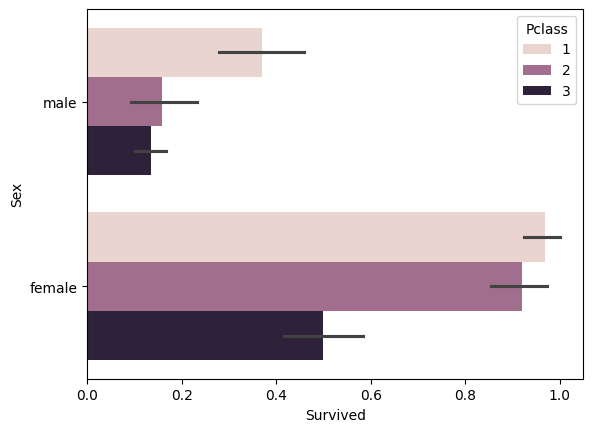

In [7]:
sns.barplot(data=df, x='Survived', y='Sex', hue='Pclass')

# BoxPlot : Numerical - Categorical 

A **box plot** (or box-and-whisker plot) is a graph that shows the **distribution of a dataset** based on five summary statistics: **minimum, first quartile (Q1), median, third quartile (Q3), and maximum**. The box represents the middle 50% of the data (the interquartile range), and the line inside the box shows the median. The “whiskers” extend to the smallest and largest values within a certain range, while points outside this range are shown as **outliers**. Box plots are useful for comparing distributions and spotting skewness or outliers in the data.


<Axes: xlabel='Survived', ylabel='Fare'>

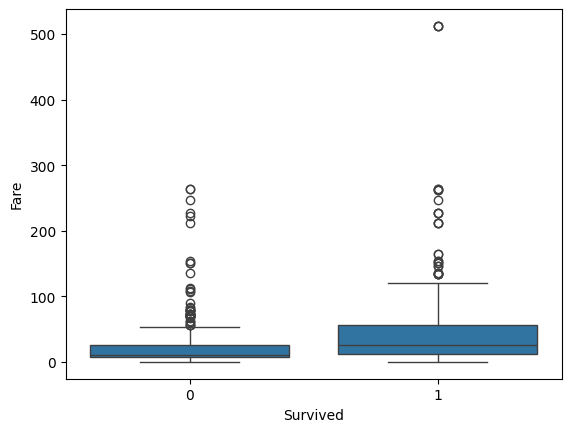

In [15]:
sns.boxplot(data=df, x='Survived', y='Fare', )

# violin plot 

A **violin plot** is a graph that shows the **distribution of a dataset** by combining features of a box plot and a density plot. It displays the median, interquartile range, and the overall data distribution’s shape (via kernel density estimation). The wider sections of the “violin” indicate where the data are more concentrated, while narrower parts show fewer data points. Violin plots are especially useful for comparing distributions across multiple categories, as they provide more detail about data variation than a box plot.


<Axes: xlabel='Survived', ylabel='Fare'>

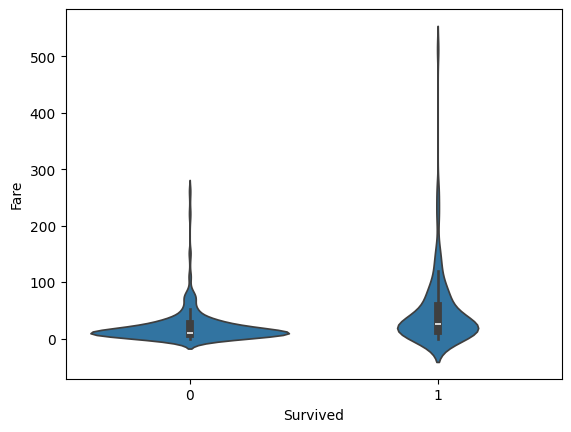

In [55]:
sns.violinplot(x='Survived', y='Fare', data=df)

# Displot : Numerical Categorical

A **displot** (short for *distribution plot*) is a visualization used to show the **distribution of a single variable**. It’s often used in Python’s Seaborn library and can display histograms, kernel density estimates (KDEs), or both together. Displots help reveal the shape of the data — such as whether it’s normal, skewed, or has multiple peaks — and are useful for understanding how values are spread or clustered in a dataset.


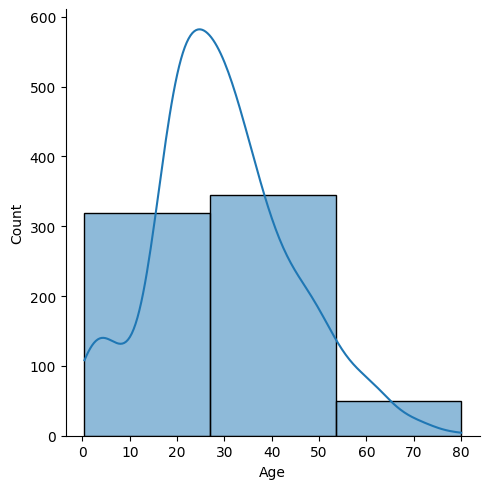

In [20]:
sns.displot(data=df['Age'], bins=3, kde=True)

# HeatMap: Categorical - Categorical

A **heatmap** is a graphical representation of data where values are shown as colors in a matrix or grid. It’s commonly used to visualize the **magnitude of values across two dimensions**, making it easy to spot patterns, correlations, or areas of high and low intensity. Heatmaps are popular in fields like data analysis, biology, and machine learning—for example, to show correlation matrices or activity levels across time and categories. The color intensity represents the value, with different colors indicating higher or lower numbers.


<Axes: xlabel='Survived', ylabel='Sex'>

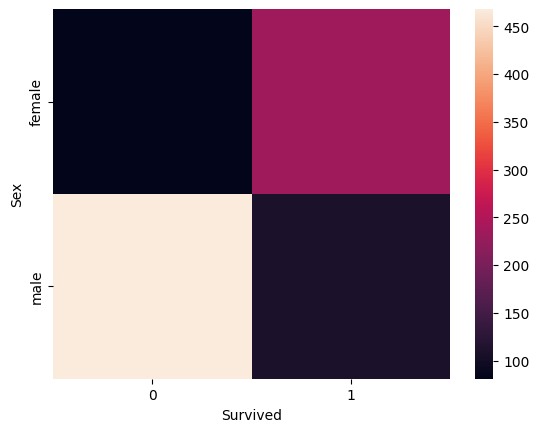

In [28]:
sns.heatmap(pd.crosstab(df['Sex'], df['Survived']))

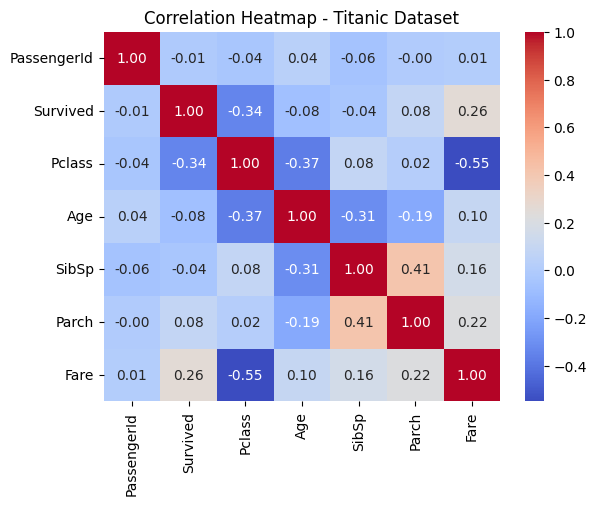

In [35]:
# Compute correlation
corr = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Titanic Dataset')
plt.show()


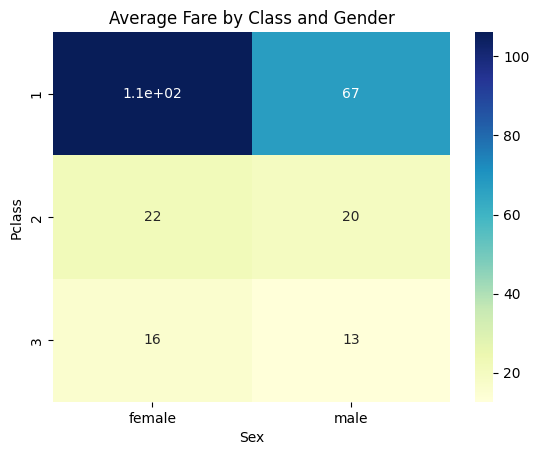

In [41]:
pivot = df.pivot_table(
    values='Fare',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
)
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Average Fare by Class and Gender')
plt.show()


# ClusterMap: Categorical - Catgorical

A **clustermap** is a type of heatmap that includes **hierarchical clustering** of both rows and columns. It groups similar data points together based on their patterns, then displays these clusters alongside the heatmap using dendrograms (tree-like diagrams). Clustermaps help reveal natural groupings and relationships in complex datasets, making it easier to interpret patterns, especially in fields like genomics, bioinformatics, or any large-scale data analysis.


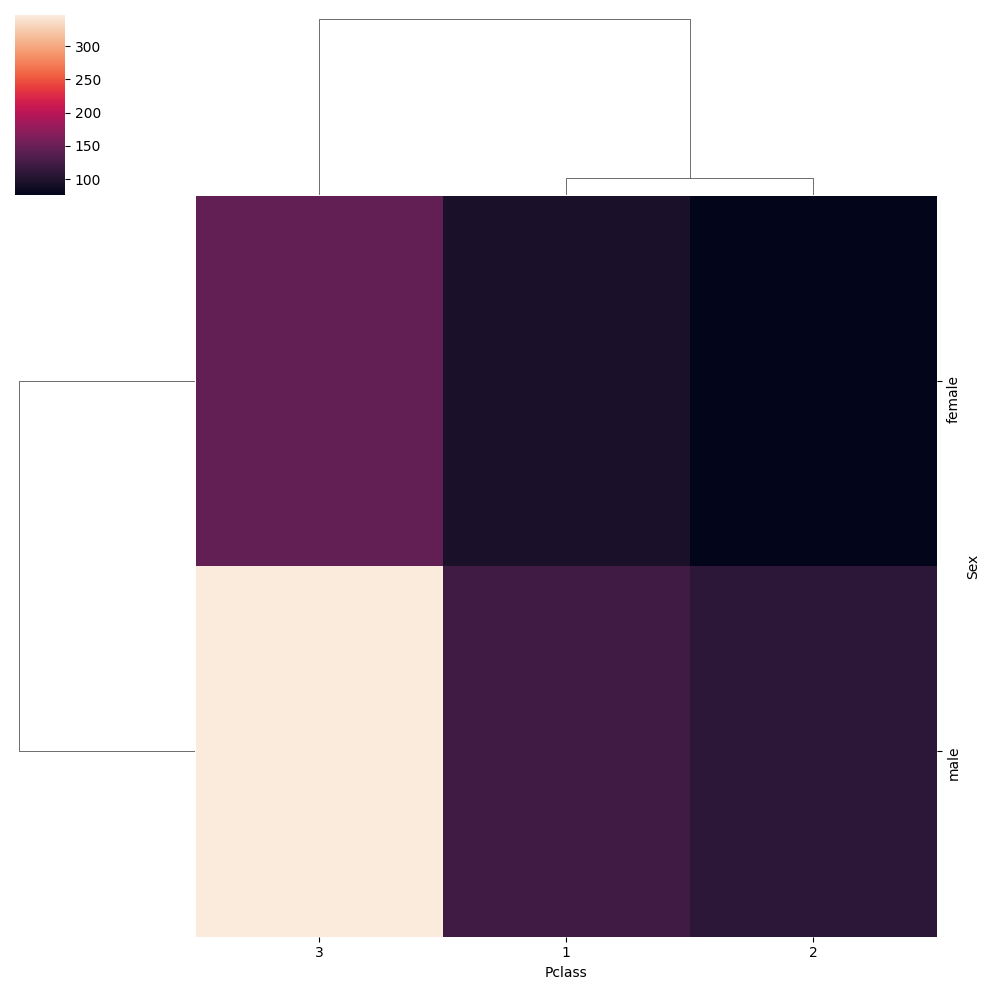

In [44]:
sns.clustermap(pd.crosstab(df['Sex'],df['Pclass']))

# PairPlot : btwn Colns

A **pairplot** is a grid of scatter plots that shows the relationships between **all pairs of variables** in a dataset. Along the diagonal, it often displays the distribution of each individual variable (like a histogram or KDE). Pairplots help visualize correlations, patterns, and potential outliers across multiple variables at once, making them a great tool for exploratory data analysis. They’re commonly used with small to medium-sized datasets to get a quick overview of how variables interact.


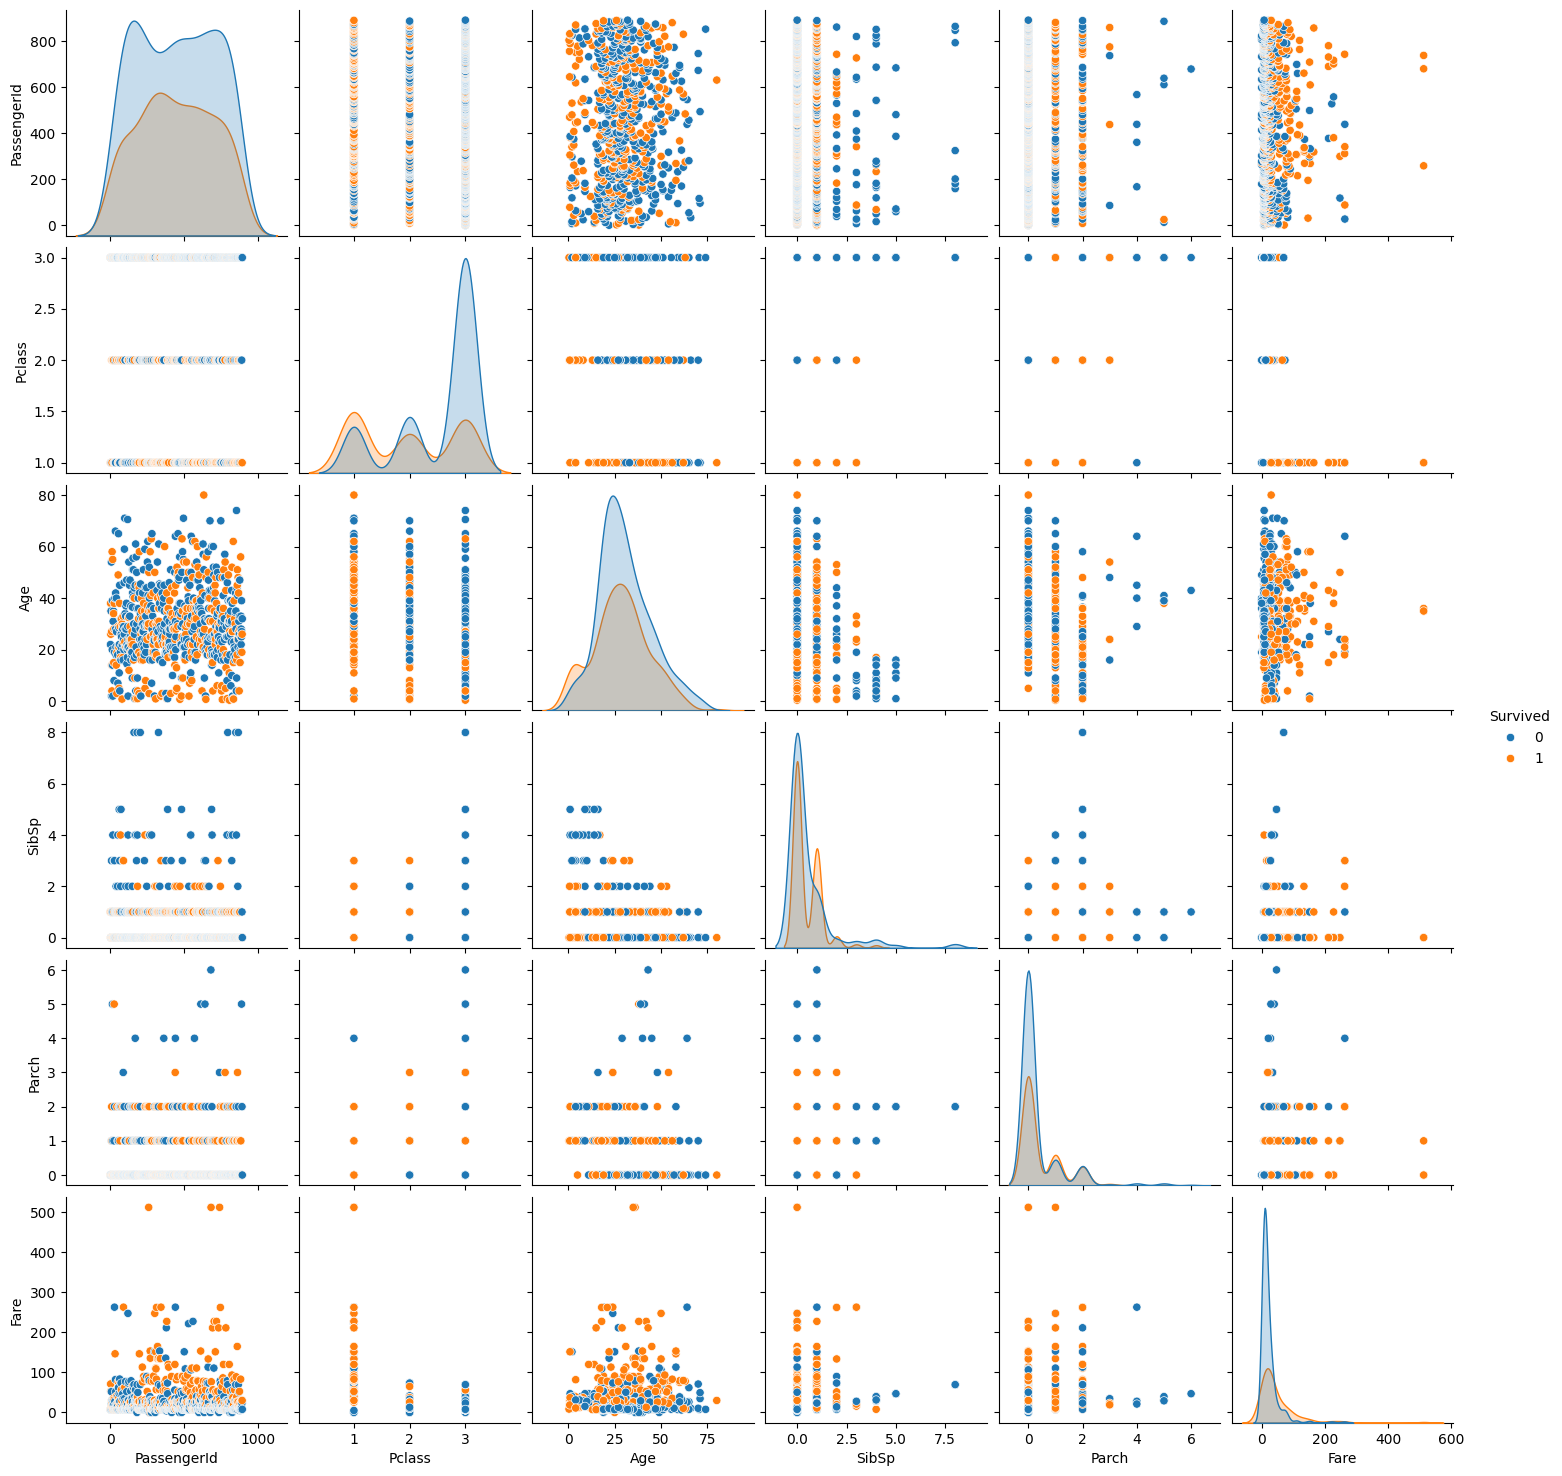

In [48]:
sns.pairplot(data=df, hue='Survived')